In [1]:
# Library
import pandas as pd
import numpy as np
import os
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

import re
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from konlpy.tag import Okt

from gensim.models import Word2Vec
from gensim.models import KeyedVectors

In [2]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from tqdm import tqdm_notebook

# 이전 그리디 알고리즘.ipnyb파일에서 수행했던 결과
model = Word2Vec.load("final_w2v.model")

# 단어 벡터 확인
word_vectors = model.wv

In [4]:
t = pd.read_csv('전처리완료토큰.csv')
t2 = t[t['Year']>=2014]
t2.reset_index(drop=True, inplace=True)
t2.head()

,Year,tokens
0,2017,qrs complex detection method extensively studi...
1,2017,paper study problem 17_moving_target_detection...
2,2017,objective using fusion algorithm 17_edge_detec...
3,2017,view special condition gas drainage boreholes ...
4,2017,paper propose trajectory tracking 17_control_m...


In [5]:
t2['tokens2'] = t2['tokens'].apply(lambda x: [word for word in word_tokenize(x)])
sentences = t2['tokens2'].tolist()

In [6]:
sentences = [sentence for sentence in tqdm(sentences, desc="Processing sentences")]

sentences_flat = [word for sentence in sentences for word in sentence]
sentences_flat = list(set(sentences_flat))

# 숫자로 시작하고 언더바로 구분된 패턴 찾기
pattern = r'\d{2}_[a-zA-Z]+'

# 패턴에 맞는 단어들만 추출하여 새로운 리스트 생성
sentences_flat = [word for word in sentences_flat if re.match(pattern, word)]

Processing sentences: 100%|███████| 1275504/1275504 [00:03<00:00, 352957.38it/s]


In [11]:
from tqdm import tqdm
word_vector_list = []
for i in tqdm(range(len(sentences_flat))):
    word = str(sentences_flat[i])
    vector = word_vectors[word]
    word_vector_list.append(vector)

100%|█████████████████████████████████| 90733/90733 [00:00<00:00, 281838.12it/s]


In [14]:
len(word_vector_list)

90733

In [17]:
np.array(word_vector_list)

array([[-1.05193987e-01,  1.24709094e-02,  2.27038208e-02, ...,
        -7.19977766e-02, -2.76270993e-02, -3.02322842e-02],
       [-9.29197893e-02,  7.75448326e-03,  4.39341739e-02, ...,
        -1.44382715e-02,  3.11233196e-02, -8.59515369e-02],
       [-3.14412713e-02, -8.11506528e-03,  4.90683354e-02, ...,
        -1.55908074e-02,  8.90982971e-02, -8.62159766e-03],
       ...,
       [-1.97017603e-02, -3.56157459e-02, -4.77664955e-02, ...,
         4.15833807e-03,  1.33958042e-01, -4.54504862e-02],
       [-3.78188342e-01,  1.01368971e-01, -1.30125657e-01, ...,
         5.95030308e-01, -2.50130683e-01, -2.10070625e-01],
       [-5.60838170e-02,  2.11658031e-02, -1.51624233e-02, ...,
        -5.12936153e-02,  5.37833013e-02, -5.30223362e-04]], dtype=float32)

In [19]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# T-SNE 모델 생성 및 학습
tsne = TSNE(n_components=2, random_state=42, verbose=1)  # verbose 값을 조정하여 출력을 제어
word_vector_tsne = tsne.fit_transform(np.array(word_vector_list))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 90733 samples in 0.003s...
[t-SNE] Computed neighbors for 90733 samples in 106.918s...
[t-SNE] Computed conditional probabilities for sample 1000 / 90733
[t-SNE] Computed conditional probabilities for sample 2000 / 90733
[t-SNE] Computed conditional probabilities for sample 3000 / 90733
[t-SNE] Computed conditional probabilities for sample 4000 / 90733
[t-SNE] Computed conditional probabilities for sample 5000 / 90733
[t-SNE] Computed conditional probabilities for sample 6000 / 90733
[t-SNE] Computed conditional probabilities for sample 7000 / 90733
[t-SNE] Computed conditional probabilities for sample 8000 / 90733
[t-SNE] Computed conditional probabilities for sample 9000 / 90733
[t-SNE] Computed conditional probabilities for sample 10000 / 90733
[t-SNE] Computed conditional probabilities for sample 11000 / 90733
[t-SNE] Computed conditional probabilities for sample 12000 / 90733
[t-SNE] Computed conditional probabilities for s

In [22]:
tsne_vector = pd.DataFrame(word_vector_tsne, columns=['vec1','vec2'])
tsne_vector.head()

,vec1,vec2
0,1.579814,-5.487504
1,-5.043207,-6.736394
2,-2.222916,1.479245
3,-4.061806,-11.172668
4,-10.990474,-25.893003


In [25]:
tsne_vector['word'] = sentences_flat

In [27]:
tsne_vector.head()

,vec1,vec2,word
0,1.579814,-5.487504,15_optical_transport_network
1,-5.043207,-6.736394,16_compact_modeling
2,-2.222916,1.479245,23_data_logging
3,-4.061806,-11.172668,23_tangible_interface
4,-10.990474,-25.893003,23_automatic_controlpredictions


In [32]:
# 연도 붙이기
tsne_vector['year'] = 0
for i in tqdm(range(len(tsne_vector))):
    year = int('20' + tsne_vector['word'][i][:2])
    tsne_vector['year'][i] = year

100%|███████████████████████████████████| 90733/90733 [00:09<00:00, 9188.33it/s]


In [54]:
tsne_vector[tsne_vector['word'].str.contains('92')]

,vec1,vec2,word,year
5702,-17.635641,-31.861227,21_aes_128192256,2021
22453,2.246636,1.311854,19_aes_128192256,2019
67941,-14.854471,-34.886047,92_pct,2092


In [55]:
tsne_vector2 = tsne_vector[(tsne_vector['year']>=2014) & (tsne_vector['year']<=2023)]

In [34]:
def get_blue_color(year):
    alpha = (year - df['year'].min()) / (df['year'].max() - df['year'].min())  # 연도에 따라 농도를 조정
    return to_rgba('blue', alpha=alpha)

100%|███████████████████████████████████| 90733/90733 [2:58:29<00:00,  8.47it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


KeyError: 'year'

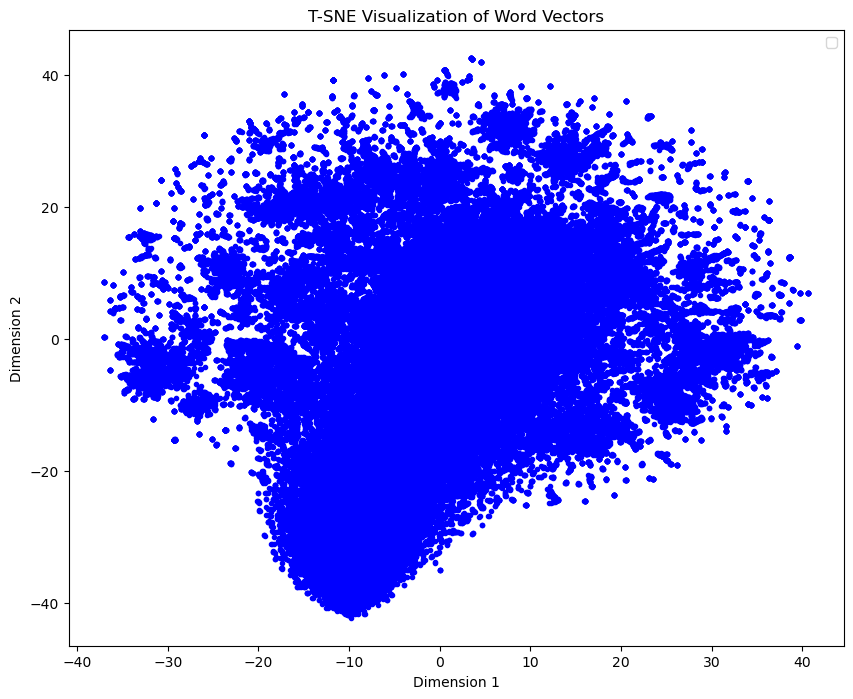

In [39]:
import tqdm

plt.figure(figsize=(10, 8))
for i, row in tqdm.tqdm(tsne_vector.iterrows(), total=len(tsne_vector)):
    color = get_blue_color(row['year']) if 'year' in df.columns else 'blue'
    plt.scatter(row['vec1'], row['vec2'], color=color, marker='.')

plt.title('T-SNE Visualization of Word Vectors')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()

# 컬러바 추가
if 'year' in tsne_vector.columns:
    sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=df['year'].min(), vmax=df['year'].max()))
    sm._A = []  # 더미 데이터 설정 (이 부분은 반드시 필요함)
    plt.colorbar(sm, label='Year')

plt.show()


Text(0, 0.5, 'Dimension 2')

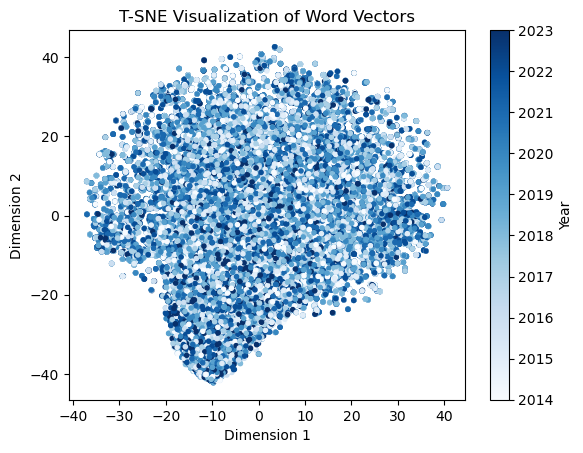

In [57]:
plt.scatter(tsne_vector2['vec1'], tsne_vector2['vec2'],c=tsne_vector2['year'],cmap='Blues', marker='.')
plt.title('T-SNE Visualization of Word Vectors')
plt.colorbar(label='Year')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

In [49]:
tsne_vector['year'].min()

2003

In [51]:
tsne_vector['year'].unique()

array([2015, 2016, 2023, 2017, 2019, 2022, 2021, 2018, 2014, 2020, 2051,
       2030, 2003, 2013, 2092, 2060, 2032])